In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data_for_Clustering.csv',low_memory = False)
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')
df.head(1000)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.568900,77.856240
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.528100,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.857150
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.248800,78.258800
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.245550,78.247700
...,...,...,...,...,...,...,...,...,...,...,...
995,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Deopura BO,848201.0,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
996,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Samsa BO,848201.0,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
997,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Fateha BO,851111.0,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379
998,Bihar Circle,"East Region, Bhagalpur",Begusarai Division,Manopur BO,851111.0,BO,Delivery,BEGUSARAI,BIHAR,25.416675,86.129379




# The visualization for Telangana State Pincodes on a Graph

In [ ]:

df_telangana = df[df['StateName']=='TELANGANA']
df_telangana.head(1000)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186.0,BO,Delivery,NIZAMABAD,TELANGANA,18.684554,78.077374
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180.0,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180.0,BO,Delivery,NIZAMABAD,TELANGANA,18.532992,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187.0,BO,Delivery,KAMAREDDY,TELANGANA,18.309656,77.946632
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101.0,BO,Delivery,KAMAREDDY,TELANGANA,18.210820,78.485349
...,...,...,...,...,...,...,...,...,...,...,...
3381,Telangana Circle,Hyderabad Region,Nizamabad Division,Gadepalli B.O,503212.0,BO,Delivery,NIZAMABAD,TELANGANA,18.968804,78.222956
3382,Telangana Circle,Hyderabad Region,Nizamabad Division,Marampalli B.O,503212.0,BO,Delivery,NIZAMABAD,TELANGANA,18.914375,78.219261
3383,Telangana Circle,Hyderabad Region,Nizamabad Division,Vannel K B.O,503212.0,BO,Delivery,NIZAMABAD,TELANGANA,18.937682,78.185878
3384,Telangana Circle,Hyderabad Region,Nizamabad Division,Motha B.O,503311.0,BO,Delivery,NIZAMABAD,TELANGANA,18.740338,78.411278


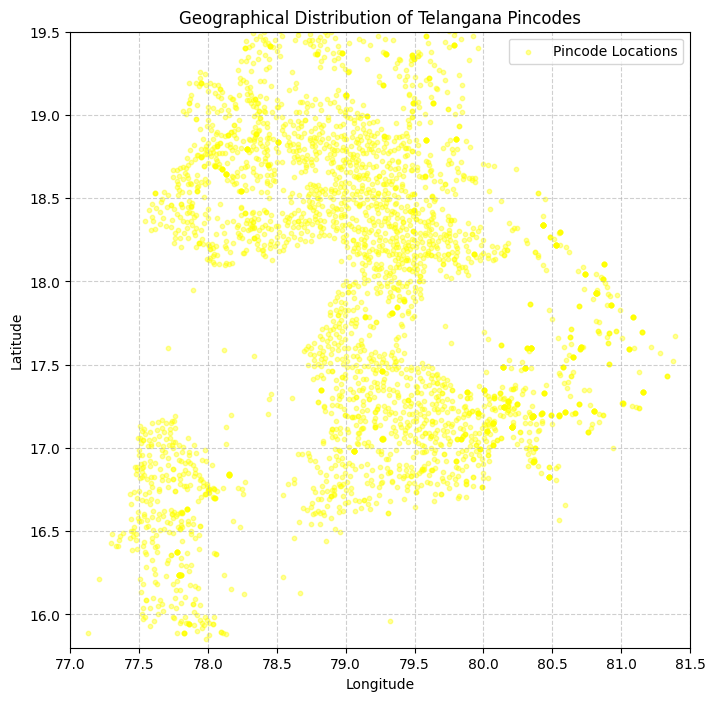

In [ ]:
#
df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])
import matplotlib.pyplot as plt

# Define Telangana bounding box
lat_min, lat_max = 15.8, 19.5
lon_min, lon_max = 77.0, 81.5

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
longitudes = df_telangana["Longitude"]
latitudes = df_telangana["Latitude"]
# Scatter plot of pincode locations
ax.scatter(longitudes, latitudes, c="yellow", alpha=0.4, s=10, label="Pincode Locations")

# Set labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geographical Distribution of Telangana Pincodes")

# Set axis limits to focus on Telangana
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show plot
plt.show()

# Implementing K -Means Clustering for our Points


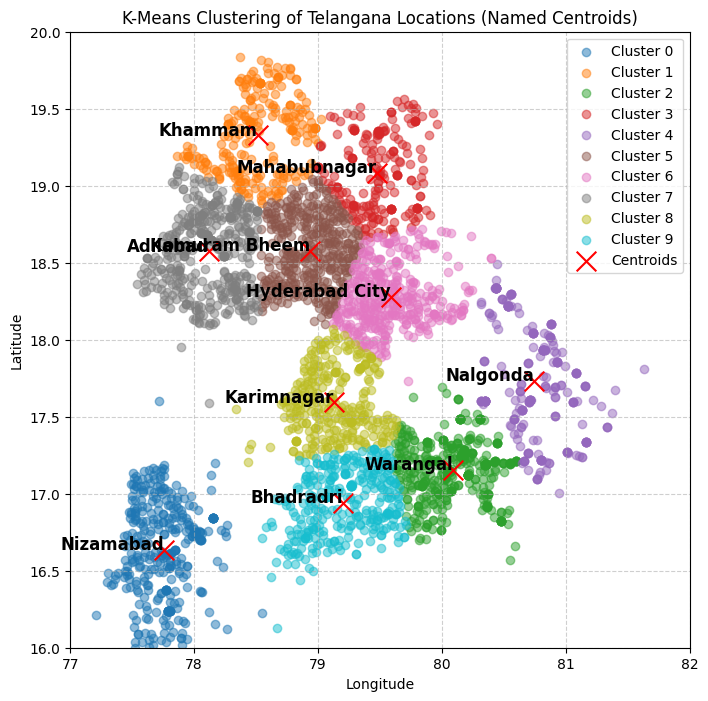

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

df_telangana = df_telangana.dropna(subset=["Latitude", "Longitude"])

# Filter data to restrict within the specified range
df_telangana = df_telangana[
    (df_telangana["Longitude"] >= 77) & (df_telangana["Longitude"] <= 82) &
    (df_telangana["Latitude"] >= 16) & (df_telangana["Latitude"] <= 20)
]

# Extract data points
data_points = df_telangana[['Latitude', 'Longitude']].values.tolist()

def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two points."""
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

def initialize_centroids(data, k):
    """Randomly pick k centroids from the dataset."""
    return random.sample(data, k)

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = {i: [] for i in range(len(centroids))}
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def compute_new_centroids(clusters):
    """Recalculate centroids as the mean of assigned points."""
    new_centroids = []
    for cluster in clusters.values():
        if cluster:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            centroid = random.choice(cluster)  # Handle empty clusters
        new_centroids.append(centroid)
    return new_centroids

def k_means(data, k, max_iterations=100):
    """Run K-Means Clustering Algorithm."""
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = compute_new_centroids(clusters)

        if new_centroids == centroids:  # Stop if centroids don't change
            break
        centroids = new_centroids

    return clusters, centroids

# Run K-Means with k=10
k = 10
clusters, centroids = k_means(data_points, k)

# Assign cluster labels
df_telangana["Cluster"] = [None] * len(df_telangana)
for cluster_index, points in clusters.items():
    for point in points:
        idx = df_telangana[(df_telangana["Latitude"] == point[0]) & (df_telangana["Longitude"] == point[1])].index
        df_telangana.loc[idx, "Cluster"] = cluster_index

# Telangana district names (manually mapped)
cluster_names = ["Nizamabad", "Khammam", "Warangal", "Mahabubnagar", "Nalgonda",
                 "Komuram Bheem", "Hyderabad City", "Adilabad", "Karimnagar", "Bhadradri"]

# Plot Clusters
plt.figure(figsize=(8, 8))
for cluster_index, points in clusters.items():
    latitudes = [p[0] for p in points]
    longitudes = [p[1] for p in points]
    plt.scatter(longitudes, latitudes, label=f"Cluster {cluster_index}", alpha=0.5)

# Plot Centroids
centroid_lats = [c[0] for c in centroids]
centroid_lons = [c[1] for c in centroids]
plt.scatter(centroid_lons, centroid_lats, c='red', marker='x', s=200, label="Centroids")

# Annotate Centroids
for i, (lat, lon) in enumerate(centroids):
    if i < len(cluster_names):  # Avoid out-of-range error
        plt.text(lon, lat, cluster_names[i], fontsize=12, ha='right', color='black', fontweight='bold')

# Formatting
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Telangana Locations (Named Centroids)")
plt.xlim(77, 82)
plt.ylim(16, 20)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()